In [20]:
import sys
print(sys.version)

3.10.6 (main, Nov  2 2022, 18:53:38) [GCC 11.3.0]


In [21]:
import sklearn.ensemble
import shap
import numpy as np
import numba
import time
import xgboost
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
X,y = shap.datasets.boston()
X.shape

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

(506, 13)

In [23]:
X, y = make_regression(n_samples=400, n_features=16, n_informative=8,random_state=0, shuffle=False)

model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=10)
model.fit(X, y)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [24]:
# bst = xgboost.train({"learning_rate": 0.01, "max_depth": 4}, xgboost.DMatrix(X, label=y), 1000)

In [25]:
# start = time.time()
# shap_values = bst.predict(xgboost.DMatrix(X), pred_contribs=True)
# print(time.time() - start)


In [26]:
from shap.explainers.pytree import *

# x = X.head()
# x = X[:1]
x = X
x

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.12167502,
         0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , ...,  1.46935877,
         0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215, ..., -0.4380743 ,
        -1.25279536,  0.77749036],
       ...,
       [ 0.65717883,  0.69047822,  0.95895162, ..., -0.46446719,
        -0.93891651,  1.21233882],
       [-0.13056054,  0.21230901,  1.20128792, ..., -0.28799758,
        -1.45415099,  0.24241493],
       [ 1.22379834, -0.85122832,  1.52658725, ...,  0.34265399,
        -0.09796724, -0.24024461]])

In [27]:
from shap import TreeExplainer as TreeCext
start = time.time()
res_shap_cext = TreeCext(model).shap_values(x, banz=False)
time_shap_cext = time.time() - start
time_shap_cext

ile drzew cext? 1000
using treeshap and cext
banz = False
here37
using dense_Tree_pred


15.826152086257935

In [28]:
start = time.time()
res_banz_cext = TreeCext(model).shap_values(x, banz=True)
time_banz_cext = time.time() - start
time_banz_cext

ile drzew cext? 1000
using treeshap and cext
banz = True
using cext banz


11.735644817352295

In [10]:
ex = TreeExplainer(model)
start = time.time()
res_shap_py = ex.shap_values(x)
time_shap_py = time.time() - start

oryginalna implemenacja shap_values
other model type
using slow python treeshap


KeyboardInterrupt: 

In [ ]:
start = time.time()
res_banz_py = ex.banz_values(x)
time_banz_py = time.time() - start

In [ ]:
line = np.asarray(x[:1])
ex.brute_banz(line[0], 0)

In [ ]:
ex.brute_shap(line[0], 0)

In [30]:
results_dict_cext = {}
results_dict_cext['banz'] = {}
results_dict_cext['shap'] = {}

In [31]:
for i in range(1, 10):
    X, y = make_regression(n_samples=200 * i, n_features=16, n_informative=8,random_state=0, shuffle=False)

    model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000 + 100 * i, max_depth=10 + i)
    model.fit(X, y)
    
    start = time.time()
    res_shap_cext = TreeCext(model).shap_values(x, banz=False)
    res_shap = time.time() - start
    
    start = time.time()
    res_banz_cext = TreeCext(model).shap_values(x, banz=True)
    res_banz = time.time() - start
    
    print(res_shap)
    print(res_banz)
    results_dict_cext['banz'][i] = res_banz
    results_dict_cext['shap'][i] = res_shap
    

ile drzew cext? 1100
using treeshap and cext
banz = False
here37
using dense_Tree_pred
ile drzew cext? 1100
using treeshap and cext
banz = True
using cext banz
8.738715648651123
7.431136608123779
ile drzew cext? 1200
using treeshap and cext
banz = False
here37
using dense_Tree_pred
ile drzew cext? 1200
using treeshap and cext
banz = True
using cext banz
22.66462540626526
16.550737857818604
ile drzew cext? 1300
using treeshap and cext
banz = False
here37
using dense_Tree_pred
ile drzew cext? 1300
using treeshap and cext
banz = True
using cext banz
39.65123105049133
27.40071415901184
ile drzew cext? 1400
using treeshap and cext
banz = False
here37
using dense_Tree_pred
ile drzew cext? 1400
using treeshap and cext
banz = True
58.617032051086426
36.93256616592407
using cext banz
ile drzew cext? 1500
using treeshap and cext
banz = False
here37
using dense_Tree_pred
ile drzew cext? 1500
using treeshap and cext
banz = True
using cext banz
70.8313627243042
48.294753313064575
ile drzew cext? 16

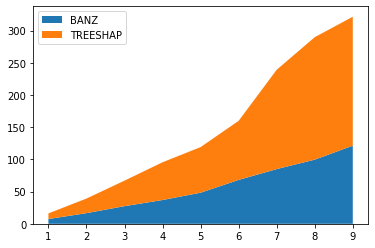

In [51]:
x = [i for i in results_dict_cext['banz']]
a1 = [results_dict_cext['banz'][i] for i in results_dict_cext['banz']]
a2 = [results_dict_cext['shap'][i] for i in results_dict_cext['shap']]

y_values = {"banz": a1, "treeshap": a2}
labels = ["BANZ", "TREESHAP"]

fig, ax = plt.subplots()
ax.stackplot(x, y_values.values(), labels=labels)

ax.legend(loc='upper left')
plt.show()

In [52]:
results_dict_py = {}
results_dict_py['banz'] = {}
results_dict_py['shap'] = {}

In [93]:
for i in range(1, 10):
    X, y = make_regression(n_samples=100 + 25 * i, n_features=6, n_informative=2,random_state=0, shuffle=False)

    model = sklearn.ensemble.RandomForestRegressor(n_estimators=100 + 25 * i, max_depth=4)
    model.fit(X, y)
    
    ex = TreeExplainer(model)
    print('created model')
    start = time.time()
    res_shap_py = ex.shap_values(X)
    time_shap_py = time.time() - start
    
    start = time.time()
    res_banz_py = ex.banz_values(X)
    time_banz_py = time.time() - start
    
    print(res_shap_py)
    print(res_banz_py)
    results_dict_py['banz'][i] = time_banz_py
    results_dict_py['shap'][i] = time_shap_py
    

created model
oryginalna implemenacja shap_values
other model type
using slow python treeshap
nasza implementacja banz values
other model type
wlasciwe obliczenia w sekundzie: 0.0011878013610839844
dwa wymiary
typ resa: <class 'list'>, <class 'list'>
[[ 3.93547413e+01  3.07068018e+01 -1.54932966e-01 -2.65120207e-01
   1.44340425e-01 -2.90919824e-01 -2.62955464e+00]
 [ 2.08264073e+01  6.34622781e-01  1.70141045e-01  1.20188017e-01
  -1.26943476e-01  8.07217422e-01 -2.62955464e+00]
 [ 1.79763092e+01  1.57377385e+01 -2.49382930e-01  8.89507326e-02
  -4.61610576e-02 -1.14327878e-01 -2.62955464e+00]
 [ 5.07315821e+00 -6.01675928e+01  7.38700589e-01 -7.37966300e-02
  -7.56382297e-02 -3.02549563e-02 -2.62955464e+00]
 [ 2.92830378e+01 -7.59560783e+01  7.29865379e-01  2.98349176e-01
   4.35108311e-01  1.44480555e+00 -2.62955464e+00]
 [ 1.02496693e+01  2.55679954e+01  2.28342162e-01  1.12013831e-01
  -9.60378759e-03 -1.75563823e-01 -2.62955464e+00]
 [ 2.08102440e+01  8.68970869e+01  1.11840600e-

nasza implementacja banz values
other model type
wlasciwe obliczenia w sekundzie: 0.00047898292541503906
dwa wymiary
typ resa: <class 'list'>, <class 'list'>
[[ 1.57089632e+02  2.92217059e+01 -7.67436612e-02 ... -6.96664108e-01
  -3.94634764e-01 -6.02466556e-01]
 [ 8.94962944e+01 -1.23980693e+01  3.97621268e-01 ...  4.39784094e-01
  -4.23929521e-01 -6.02466556e-01]
 [ 8.23095450e+01 -2.23327083e+00 -8.12294420e-02 ...  6.30107189e-01
  -1.35116518e-01 -6.02466556e-01]
 ...
 [-1.71498956e+00 -1.20720594e+01  4.98441160e-01 ...  2.45471445e-01
   1.41919985e-01 -6.02466556e-01]
 [-1.48455106e+00 -4.37694265e+01  7.33348163e-01 ...  1.74028775e-01
   1.27888856e-01 -6.02466556e-01]
 [-1.17901582e+02  9.28647407e+01  1.11067832e+00 ... -8.94080477e-01
   4.52672599e-01 -6.02466556e-01]]
[[ 1.57097367e+02  2.92329194e+01 -1.11431968e-01  5.96656560e-01
  -6.89931956e-01 -4.30871204e-01]
 [ 8.93703697e+01 -1.25060531e+01  3.22658187e-01  2.88095961e-01
   3.87725564e-01 -3.62751270e-01]
 [ 8

nasza implementacja banz values
other model type
wlasciwe obliczenia w sekundzie: 0.0005576610565185547
dwa wymiary
typ resa: <class 'list'>, <class 'list'>
[[ 2.56370117e+01  1.44473764e+01 -5.34985485e-02 ...  7.43773820e-02
  -2.62502228e-01 -1.51038877e-01]
 [ 1.56374116e+01  4.16136763e+00  6.75616309e-02 ...  4.37813452e-02
   3.93808312e-01 -1.51038877e-01]
 [ 1.23037719e+01  5.44445889e+00 -8.06027526e-03 ...  6.12782154e-02
  -5.66710484e-02 -1.51038877e-01]
 ...
 [-3.89468256e-01 -2.37029766e+01 -4.28793408e-02 ...  1.49113177e-01
   1.49956608e-01 -1.51038877e-01]
 [ 5.58307089e+00 -4.44601037e+01 -1.09867176e-01 ...  4.12317685e-01
   1.13649049e-01 -1.51038877e-01]
 [ 2.41791668e+01  1.46488041e+01 -1.26071574e-02 ...  5.69132477e-03
  -2.70970520e-01 -1.51038877e-01]]
[[ 2.56197396e+01  1.44322422e+01 -7.31470800e-02 -2.52767220e-02
   8.65767608e-02 -2.87980890e-01]
 [ 1.56818832e+01  4.20617404e+00  6.92921004e-02 -1.57850605e-03
   4.72832898e-02  4.43826422e-01]
 [ 1.

created model
oryginalna implemenacja shap_values
other model type
using slow python treeshap
nasza implementacja banz values
other model type
wlasciwe obliczenia w sekundzie: 0.0009372234344482422
dwa wymiary
typ resa: <class 'list'>, <class 'list'>
[[ 5.33665562e+01  9.51211694e+00 -1.05062478e-01 ... -1.72256456e-01
  -2.32094879e-01 -2.25826211e+00]
 [ 2.37768325e+01 -7.03244194e-01  8.61691423e-02 ... -1.62356043e-03
  -1.49777960e-02 -2.25826211e+00]
 [ 2.04799659e+01  2.76421875e+00  7.44847787e-03 ... -7.10324373e-03
  -6.85867958e-03 -2.25826211e+00]
 ...
 [-1.79719139e+01  1.12589974e+01  1.10543596e-01 ... -1.01711859e-02
  -1.05314411e-02 -2.25826211e+00]
 [ 2.35154879e+01 -1.13799109e+01 -4.65612873e-02 ...  3.08132532e-03
   4.84594929e-03 -2.25826211e+00]
 [ 1.33841436e+01  1.13942894e+01  3.93564967e-02 ... -1.49872210e-02
  -1.10228932e-02 -2.25826211e+00]]
[[ 5.33904104e+01  9.53569808e+00 -1.06878221e-01  2.68309094e-02
  -1.59083122e-01 -2.20168005e-01]
 [ 2.3777218

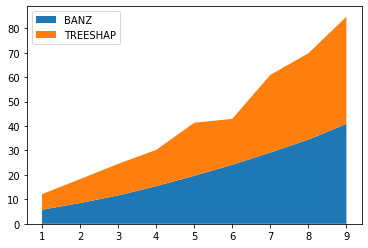

In [94]:
x = [i for i in results_dict_py['banz']]
a1 = [results_dict_py['banz'][i] for i in results_dict_py['banz']]
a2 = [results_dict_py['shap'][i] for i in results_dict_py['shap']]

y_values = {"banz": a1, "treeshap": a2}
labels = ["BANZ", "TREESHAP"]

fig, ax = plt.subplots()
ax.stackplot(x, y_values.values(), labels=labels)

ax.legend(loc='upper left')
plt.show()

In [98]:
len(a1)

9

In [99]:
len(a2)

9